### Import the Library

In [8]:
from mle_estimator.estimator import mle_normal, mle_exponential, mle_gamma, mle_weibull, mle_bernoulli, mle_geometric, gof_test

###  Distribution Fit Result

In [7]:
import numpy as np
np.random.seed(6644)  
alpha = 0.05  # significance level

# Normal Distribution 
print("-" * 50)
data_normal = np.random.normal(loc=5, scale=2, size=1000) # mu = 5, sigma = 2
mu, sigma2 = mle_normal(data_normal)
print("Normal Distribution")
print("Estimated μ:", mu)
print("Estimated σ²:", sigma2)
print("GoF Test:", gof_test(data_normal, "normal", alpha))
print("-" * 50)

# Exponential Distribution 
data_expo = np.random.exponential(scale=1.5, size=1000)  # lambda = 2/3
lam = mle_exponential(data_expo)
print("Exponential Distribution")
print("Estimated λ:", lam)
print("GoF Test:", gof_test(data_expo, "exponential", alpha))
print("-" * 50)

# Gamma Distribution 
data_gamma = np.random.gamma(shape=2, scale=1.5, size=1000) # alpha=2, beta=1.5
alpha_hat, beta_hat = mle_gamma(data_gamma)
print("Gamma Distribution")
print("Estimated α:", alpha_hat)
print("Estimated β:", beta_hat)
print("GoF Test:", gof_test(data_gamma, "gamma", alpha))
print("-" * 50)

# Weibull Distribution 
data_weibull = np.random.weibull(a=2, size=1000) * 1.5  # alpha=2, beta=1.5
alpha_w, beta_w = mle_weibull(data_weibull)
print("Weibull Distribution")
print("Estimated α:", alpha_w)
print("Estimated β:", beta_w)
print("GoF Test:", gof_test(data_weibull, "weibull", alpha))
print("-" * 50)

# Bernoulli Distribution 
data_bern = np.random.binomial(1, p=0.6, size=1000) #p=0.6
p_hat = mle_bernoulli(data_bern)
print("Bernoulli Distribution")
print("Estimated p:", p_hat)
print("-" * 50)

# Geometric Distribution 
data_geom = np.random.geometric(p=0.4, size=1000) #p=0.4
p_hat = mle_geometric(data_geom)
print("Geometric Distribution")
print("Estimated p:", p_hat)
print("GoF Test:", gof_test(data_geom, "geometric", alpha))
print("-" * 50)

--------------------------------------------------
Normal Distribution
Estimated μ: 5.027764221641179
Estimated σ²: 4.038632395332671
GoF Test: (221.32730483198728, 'fail to reject')
--------------------------------------------------
Exponential Distribution
Estimated λ: (0.6330113172338987,)
GoF Test: (202.99889714506043, 'fail to reject')
--------------------------------------------------
Gamma Distribution
Estimated α: 2.1664992460671257
Estimated β: 1.3051034514026818
GoF Test: (228.5541655796244, 'fail to reject')
--------------------------------------------------
Weibull Distribution
Estimated α: 1.935716421633673
Estimated β: 1.4830070281841183
GoF Test: (236.11994772656573, 'reject')
--------------------------------------------------
Bernoulli Distribution
Estimated p: (0.594,)
--------------------------------------------------
Geometric Distribution
Estimated p: (0.40048057669203047,)
GoF Test: (22.59053253421881, 'fail to reject')
---------------------------------------------

In [6]:
np.random.seed(6644)
alpha = 0.05  

#generate weibull distribution
true_alpha, true_beta = 2.0, 1.5
data = np.random.weibull(a=true_alpha, size=1000) * true_beta


#weibull (fit well)
print("-" * 50)
print("Weibull Fit:")
params_weibull = mle_weibull(data)
print("Estimated α:", round(params_weibull[0], 4))
print("Estimated β:", round(params_weibull[1], 4))
print("GoF Test:", gof_test(data, "weibull", alpha))
print("-" * 50)

#exponential (not fit well)
print("Exponential Fit:")
lam_hat = mle_exponential(data)
print("Estimated λ:", round(lam_hat[0], 4))
print("GoF Test:", gof_test(data, "exponential", alpha))
print("-" * 50)

#normal (not fit well)
print("Normal Fit:")
mu, var = mle_normal(data)
print("Estimated μ:", round(mu, 4))
print("Estimated σ²:", round(var, 4))
print("GoF Test:", gof_test(data, "normal", alpha))
print("-" * 50)

--------------------------------------------------
Weibull Fit:
Estimated α: 1.9959
Estimated β: 1.48
GoF Test: (193.50300597296422, 'fail to reject')
--------------------------------------------------
Exponential Fit:
Estimated λ: 0.7628
GoF Test: (577.6329951762893, 'reject')
--------------------------------------------------
Normal Fit:
Estimated μ: 1.311
Estimated σ²: 0.4733
GoF Test: (911.8773459132088, 'reject')
--------------------------------------------------


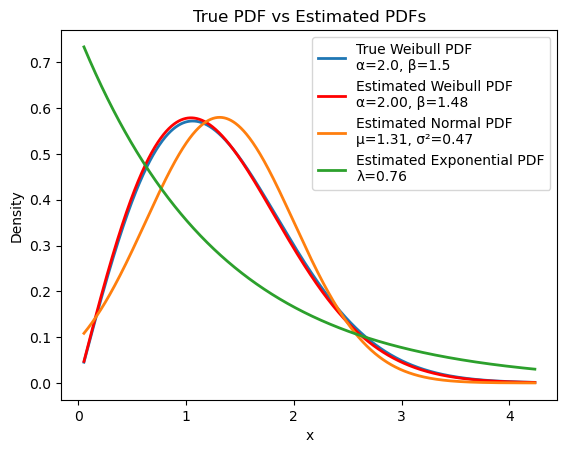

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, expon, weibull_min


np.random.seed(6644)
data = np.random.weibull(a=2, size=1000) * 1.5

# estimated parameters
alpha_hat, beta_hat = mle_weibull(data)
mu, var = mle_normal(data)
lamb = mle_exponential(data)[0]

# plot
x = np.linspace(min(data), max(data), 1000)

pdf_true = weibull_min.pdf(x, c=2.0, scale=1.5)
pdf_estimate = weibull_min.pdf(x, c=alpha_hat, scale=beta_hat)
pdf_estimate_norm = norm.pdf(x, loc=mu, scale=np.sqrt(var))
pdf_estimate_expo = expon.pdf(x, scale=1/lamb, loc=0)

plt.plot(x, pdf_true, linewidth=2, label=f"True Weibull PDF\nα=2.0, β=1.5")
plt.plot(x, pdf_estimate, 'r', linewidth=2, label=f"Estimated Weibull PDF\nα={alpha_hat:.2f}, β={beta_hat:.2f}")
plt.plot(x, pdf_estimate_norm, linewidth=2, label=f"Estimated Normal PDF\nμ={mu:.2f}, σ²={var:.2f}")
plt.plot(x, pdf_estimate_expo, linewidth=2, label=f"Estimated Exponential PDF\nλ={lamb:.2f}")

plt.xlabel("x")
plt.ylabel("Density")
plt.title('True PDF vs Estimated PDFs')
plt.legend()
plt.show()
